In [3]:
import numpy as np
import scipy
from scipy.stats import multivariate_normal

In [4]:
A, B = np.genfromtxt("data/task2_data.txt", usecols=range(1,9))

In [5]:
A

array([1.78269, 1.41994, 2.39558, 1.21721, 2.50196, 1.92164, 2.09783,
       2.19345])

In [6]:
B

array([-0.500439,  0.936184,  2.7479  ,  6.90028 ,  3.39415 ,  2.08816 ,
        6.39042 , -1.08549 ])

In [7]:
pointsA = list(zip(A[::2],A[1::2]))

In [8]:
pointsA

[(1.78269, 1.41994),
 (2.39558, 1.21721),
 (2.50196, 1.92164),
 (2.09783, 2.19345)]

In [9]:
pointsB = list(zip(B[::2],B[1::2]))

In [10]:
pointsB

[(-0.500439, 0.936184),
 (2.7479, 6.90028),
 (3.39415, 2.08816),
 (6.39042, -1.08549)]

In [11]:
def step(x):
    return 1 * (x > 0)

In [12]:
def task2_hNeuron(W, X):
    X = X.T
    bias = W[0]
    W = np.delete(W, 0, 0)
    # W shape == (D x 1)
    # X.shape == (D x N)
    Y = (W.T @ X) + bias
    # Y shape == (N x 1)
    return step(Y.T)

In [13]:
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
    print(x)
    return 1 / (1 + np.exp(-x))

In [14]:
def task2_sNeuron(W, X):
    X = X.T
    bias = W[0]
    W = np.delete(W, 0, 0)
    # W.T shape == (1 x D)
    Y = (W.T @ X) + bias
    # a shape == (1 x N)
    return sigmoid(Y.T)

In [15]:
def task2_hNN_A(X):
#     # Weights for first laye
#     W1 = np.asanyarray([ 1., -0.83043762,0.3383332 ]).reshape((3,1))
#     W2 = np.asanyarray([ 1., -0.18659937, -0.27743793]).reshape((3,1))
#     W3 = np.asanyarray([ 1., -0.45212818, 0.06827846]).reshape((3,1))
#     W4 = np.asanyarray([ 1., -0.16459742,-0.49760822]).reshape((3,1))

    

#     # Outputs from first layer
#     Y1 = task2_hNeuron(w1, X)
#     Y2 = task2_hNeuron(w2, X)
#     Y3 = task2_hNeuron(w3, X)
#     Y4 = task2_hNeuron(w4, X)
    
# #     #  Weights for second layer
# #     W5 = np.array([-3.5, 1, 1, 1, 1]).reshape((5,1))

#     iny1 =np.c_[Y1,Y2]
#     #iny2 =np.concatenate((x3,x4),axis=1)
#     iny2 =np.c_[Y3,Y4]

#     y1 = task2_hNeuron(np.array([-1,1,1]),iny1)
#     y2 = task2_hNeuron(np.array([-1,1,1]),iny2)

#     '''
#     Layer 3
#     '''

#     z =np.c_[y1,y2]

#     Y = task2_hNeuron(np.array([-1,1,1]),z)
    
# #     X_new = np.hstack((Y1, Y2, Y3, Y4))
# #     Y = task2_hNeuron(W5, X_new)
#     return Y


    # Weights for first layer
    W1 = w1.reshape((3,1))
    W2 = w2.reshape((3,1))
    W3 = w3.reshape((3,1))
    W4 = w4.reshape((3,1))
    
#     W1 = w5.reshape((3,1))
#     W2 = w6.reshape((3,1))
#     W3 = w7.reshape((3,1))
#     W4 = w8.reshape((3,1))

    # Outputs from first layer
    Y1 = task2_hNeuron(W1, X)
    Y2 = task2_hNeuron(W2, X)
    Y3 = task2_hNeuron(W3, X)
    Y4 = task2_hNeuron(W4, X)
    
    # Weights for second layertask2
    W5 = np.array([-3.5, 1, 1, 1, 1]).reshape((5,1))

#     iny1 =np.c_[Y1,Y2]
#     #iny2 =np.concatenate((x3,x4),axis=1)
#     iny2 =np.c_[Y3,Y4]

#     y1 = task2_hNeuron(np.array([-1,1,1]).reshape((3,1)),iny1)
#     y2 = task2_hNeuron(np.array([-1,1,1]).reshape((3,1)),iny2)

#     '''
#     Layer 3
#     '''

#     z =np.c_[y1,y2]

#     Y = task2_hNeuron(np.array([-1,1,1]).reshape((3,1)),z)
    
    X_new = np.hstack((Y1, Y2, Y3, Y4))
    Y = task2_hNeuron(W5, X_new)
    return Y

In [16]:
X = np.asanyarray([[0, 0], [2.38638639, 1.22122122],
       [2.39039039, 1.22122122],[2.28628629, 1.31731732]])
print(X.shape)

(4, 2)


In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches

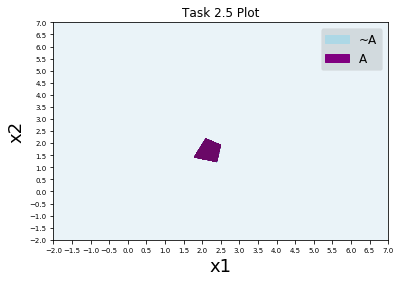

In [108]:
# Generate points between 0 and 10 to classify
x_points = np.linspace(-2,7, 1000)
y_points = np.linspace(-2,7,1000)
xx, yy = np.meshgrid(x_points, y_points)
gridX = np.vstack((xx.ravel(), yy.ravel()))


# Classify the points and reshape the result to fit the plot function
data = task2_hNN_A(gridX.T)
data = data.reshape((x_points.shape[0], y_points.shape[0]))
# Setup the plot title and axis
plt.title('Task 2.5 Plot')
plt.xticks(np.arange(-2, 12, 0.5), fontsize=7)
plt.yticks(np.arange(-2, 12, 0.5),fontsize=7)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

# Setup legend

blue_patch_legend = mpatches.Patch(color='lightblue', label='~A')
purple_patch_legend = mpatches.Patch(color='purple', label='A')
plt.legend(loc='best', fancybox=True, framealpha=0.1, handles=[blue_patch_legend, purple_patch_legend], facecolor='black', fontsize=12)

# Plot data and show result
plt.contourf(xx, yy, data, cmap=cm.BuPu)
plt.savefig('t2_regions_hNN_A.pdf')
plt.show()

In [119]:
from matplotlib import path
p = path.Path(list(zip(B[::2],B[1::2])), closed=True)

In [120]:
p

Path(array([[-0.500439,  0.936184],
       [ 2.7479  ,  6.90028 ],
       [ 3.39415 ,  2.08816 ],
       [ 6.39042 , -1.08549 ]]), array([ 1,  2,  2, 79], dtype=uint8))

In [121]:
x_points = np.linspace(-2,7, 1000)
y_points = np.linspace(-2,7,1000)
xx, yy = np.meshgrid(x_points, y_points)
gridX = np.vstack((xx.ravel(), yy.ravel()))
gridX = gridX.T

In [122]:
actual = p.contains_points(gridX)

In [28]:
actual.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
inside = gridX[actual == True]

In [124]:
outside = gridX[actual == False]

In [125]:
inside[1000]

array([0.28828829, 1.17117117])

In [32]:
len(outside)

985865

In [33]:
w = np.array([1,-0.15385466,-0.16773093])

In [34]:
w[:, np.newaxis]

array([[ 1.        ],
       [-0.15385466],
       [-0.16773093]])

In [18]:
import scipy.io as sio

In [19]:
weights = sio.loadmat("data/weights.mat")

In [20]:
w1, w2, w3, w4 = weights['weightMatrix'].T

In [21]:
w5, w6, w7, w8 = np.asanyarray([[ 1. ,    0.98977494, -0.53907994], 
 [ 1.,-0.27213978,-0.03654737],
 [ 1.,-0.18637246,-0.17595583],
 [-0.78936275, 0.2933849, 1.]])

In [22]:
def task2_hNN_AB(X):
    
    # Weight vectors for first layer perceptrons
    W1 = w1.reshape((3,1))
    W2 = w2.reshape((3,1))
    W3 = w3.reshape((3,1))
    W4 = w4.reshape((3,1))
    
    W5 = np.array(w5).reshape((3,1))
    W6 = np.array(w6).reshape((3,1))
    W7 = np.array(w7).reshape((3,1))
    W8 = np.array(w8).reshape((3,1))
#  Weight vector for second layer perceptron
    W9 = np.array([-3.5, 1, 1, 1, 1]).reshape(5,1)

    # Outputs from first layer for shape A
    Y1 = task2_hNeuron(W1, X)
    Y2 = task2_hNeuron(W2, X)
    Y3 = task2_hNeuron(W3, X)
    Y4 = task2_hNeuron(W4, X)

    # Outputs from first layer for shape B
    Y5 = task2_hNeuron(W5, X)
    Y6 = task2_hNeuron(W6, X)
    Y7 = task2_hNeuron(W7, X)
    Y8 = task2_hNeuron(W8, X)

    # Weights for logical operation neurons
    And= np.array([-1.5, 1, 1]).reshape((3,1))
    Or = np.array([-0.5, 1, 1]).reshape(3,1)
    Not = np.array([0, -1]).reshape((2,1))

    X_A = np.hstack((Y1, Y2, Y3, Y4))
    X_B = np.hstack((Y5, Y6, Y7, Y8))
    # Result of points being in A
    Y_A = task2_hNeuron(W9, X_A)
    # Result of points being in B
    Y_B = task2_hNeuron(W9, X_B)
    # Result of points being outside of A
#     Y_B = task2_hNeuron(Not, Y_A)

    Y_AB = np.hstack((Y_A,Y_B))
    Y = task2_hNeuron(np.array([0,-1,1]).reshape((3,1)), Y_AB)

    return Y

In [23]:
def task2_plot_regions_hNN_AB():
    xplot = np.linspace(-2, 7, 1000)
    yplot = np.linspace(-2, 7, 1000)
    xx, yy = np.meshgrid(xplot, yplot)
    gridX = np.vstack((xx.ravel(), yy.ravel()))

    # Classify the points and reshape the result to fit the plot function
    data = task2_hNN_AB(gridX.T)
    data = data.reshape((xplot.shape[0], yplot.shape[0]))

    # Setup the plot title and axis
    plt.title('Task 2.7 Plot')
    plt.xticks(np.arange(-2, 10, 0.5), fontsize=7)
    plt.yticks(np.arange(-2, 10, 0.5),fontsize=7)
    plt.xlabel('x1', fontsize=15)
    plt.ylabel('x2', fontsize=15)

    # Setup legend

    blue_patch_legend = mpatches.Patch(color='lightblue', label='Class 0')
    purple_patch_legend = mpatches.Patch(color='purple', label='Class 1')
    plt.legend(loc='best', fancybox=True, framealpha=0.1, handles=[blue_patch_legend, purple_patch_legend], facecolor='black', fontsize=12)

    # Plot data and show result
    plt.contourf(xx, yy, data, cmap=cm.BuPu)
    plt.savefig('t2_regions_hNN_AB.pdf')

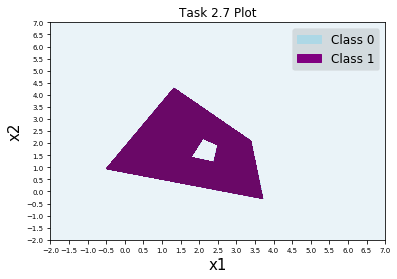

In [24]:
task2_plot_regions_hNN_AB()

In [36]:
np.array([w5,w6,w7,w8])

array([[ 1.        ,  0.98977494, -0.53907994],
       [ 1.        , -0.27213978, -0.03654737],
       [ 1.        , -0.18637246, -0.17595583],
       [-0.78936275,  0.2933849 ,  1.        ]])

In [43]:
a = np.array([1, -1, 5, -5, -6])

In [44]:
a[abs(a).argmax()]

-6

In [45]:
a[4:0]

array([], dtype=int64)

In [25]:
def task2_sNN_AB(X):
    # Weight vectors for first layer perceptrons
    W1 = w1.reshape((3,1))
    W2 = w2.reshape((3,1))
    W3 = w3.reshape((3,1))
    W4 = w4.reshape((3,1))
    
    W5 = np.array(w5).reshape((3,1))
    W6 = np.array(w6).reshape((3,1))
    W7 = np.array(w7).reshape((3,1))
    W8 = np.array(w8).reshape((3,1))
#  Weight vector for second layer perceptron
    W9 = np.array([-3.5, 1, 1, 1, 1]).reshape(5,1)

    # Outputs from first layer for shape A
    Y1 = task2_sNeuron(100*W1, X)
    Y2 = task2_sNeuron(100*W2, X)
    Y3 = task2_sNeuron(100*W3, X)
    Y4 = task2_sNeuron(100*W4, X)

    # Outputs from first layer for shape B
    Y5 = task2_sNeuron(100*W5, X)
    Y6 = task2_sNeuron(100*W6, X)
    Y7 = task2_sNeuron(100*W7, X)
    Y8 = task2_sNeuron(100*W8, X)

    # Weights for logical operation neurons
    And= np.array([-1.5, 1, 1]).reshape((3,1))
    Or = np.array([-0.5, 1, 1]).reshape(3,1)
    Not = np.array([0, -1]).reshape((2,1))

    X_A = np.hstack((Y1, Y2, Y3, Y4))
    X_B = np.hstack((Y5, Y6, Y7, Y8))
    # Result of points being in A
    Y_A = task2_sNeuron(100*W9, X_A)
    # Result of points being in B
    Y_B = task2_sNeuron(100*W9, X_B)
    # Result of points being outside of A
#     Y_B = task2_hNeuron(Not, Y_A)

    Y_AB = np.hstack((Y_A,Y_B))
    Y = task2_sNeuron(100*np.array([0,-1,1]).reshape((3,1)), Y_AB)

    return Y > 0.5

In [26]:
def task2_plot_regions_sNN_AB():
    xplot = np.linspace(-2, 7, 1000)
    yplot = np.linspace(-2, 7, 1000)
    xx, yy = np.meshgrid(xplot, yplot)
    gridX = np.vstack((xx.ravel(), yy.ravel()))

    # Classify the points and reshape the result to fit the plot function
    data = task2_sNN_AB(gridX.T)
    data = data.reshape((xplot.shape[0], yplot.shape[0]))

    # Setup the plot title and axis
    plt.title('Task 2.7 Plot')
    plt.xticks(np.arange(-2, 10, 0.5), fontsize=7)
    plt.yticks(np.arange(-2, 10, 0.5),fontsize=7)
    plt.xlabel('x1', fontsize=15)
    plt.ylabel('x2', fontsize=15)

    # Setup legend

    blue_patch_legend = mpatches.Patch(color='lightblue', label='Class 0')
    purple_patch_legend = mpatches.Patch(color='purple', label='Class 1')
    plt.legend(loc='best', fancybox=True, framealpha=0.1, handles=[blue_patch_legend, purple_patch_legend], facecolor='black', fontsize=12)

    # Plot data and show result
    plt.contourf(xx, yy, data, cmap=cm.BuPu)
#     plt.savefig('t2_regions_sNN_AB.pdf')

[[-467.11673715]
 [-466.81873973]
 [-466.5207423 ]
 ...
 [ 729.98669205]
 [ 730.28468947]
 [ 730.58268689]]
[[ 176.76994388]
 [ 176.3626212 ]
 [ 175.95529851]
 ...
 [-167.88015821]
 [-168.2874809 ]
 [-168.69480358]]
[[ 192.8074615 ]
 [ 192.63935395]
 [ 192.47124641]
 ...
 [-224.48990015]
 [-224.65800769]
 [-224.82611524]]
[[-238.93532731]
 [-238.03442641]
 [-237.13352551]
 ...
 [ 292.58887831]
 [ 293.48977921]
 [ 294.39068011]]
[[  9.861     ]
 [ 10.75268914]
 [ 11.64437827]
 ...
 [413.70312173]
 [414.59481086]
 [415.4865    ]]
[[ 161.73743   ]
 [ 161.49225903]
 [ 161.24708805]
 ...
 [-115.59066305]
 [-115.83583403]
 [-116.081005  ]]
[[ 172.465658  ]
 [ 172.29775488]
 [ 172.12985177]
 ...
 [-153.29399677]
 [-153.46189988]
 [-153.629803  ]]
[[-337.613255  ]
 [-337.34894428]
 [-337.08463356]
 ...
 [ 825.90453356]
 [ 826.16884428]
 [ 826.433155  ]]
[[-150.]
 [-150.]
 [-150.]
 ...
 [-150.]
 [-150.]
 [-150.]]
[[ -50.00521674]
 [ -50.00213874]
 [ -50.00087681]
 ...
 [-150.        ]
 [-150.  

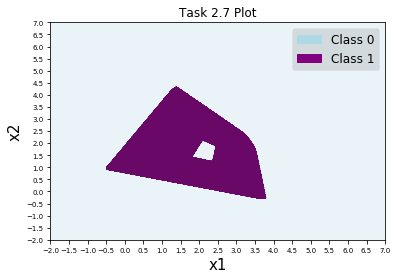

In [27]:
task2_plot_regions_sNN_AB()

In [32]:
def sNN_A(X):
    # Weight vectors for first layer perceptrons
    W1 = w1.reshape((3,1))
    W2 = w2.reshape((3,1))
    W3 = w3.reshape((3,1))
    W4 = w4.reshape((3,1))
    
    #  Weight vector for second layer perceptron
    W5 = np.array([-3.5, 1, 1, 1, 1]).reshape(5,1)

    # Outputs from first layer for shape A
    Y1 = task2_sNeuron(350*W1, X)
    Y2 = task2_sNeuron(350*W2, X)
    Y3 = task2_sNeuron(350*W3, X)
    Y4 = task2_sNeuron(350*W4, X)
    
    X_new = np.hstack((Y1, Y2, Y3, Y4))
    Y = task2_hNeuron(350*W5, X_new)
    return Y > 0.5

In [156]:
sNN_A(inside).sum()

[[-428.60501511]
 [-427.56202414]
 [-426.51903316]
 ...
 [2022.71368191]
 [2023.75667288]
 [2026.90982603]]
[[449.58969378]
 [448.16406438]
 [446.73843499]
 ...
 [ 81.09208969]
 [ 79.66646029]
 [ 79.88175273]]
[[ 289.91787466]
 [ 289.32949826]
 [ 288.74112185]
 ...
 [-497.21690884]
 [-497.80528525]
 [-498.68008954]]
[[-726.62237884]
 [-723.46922568]
 [-720.31607253]
 ...
 [-444.37369404]
 [-441.22054088]
 [-442.5051845 ]]


/home/apurv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


2130

In [28]:
def sNN_B(X):
    W5 = np.array(w5).reshape((3,1))
    W6 = np.array(w6).reshape((3,1))
    W7 = np.array(w7).reshape((3,1))
    W8 = np.array(w8).reshape((3,1))
    
    # Outputs from first layer for shape B
    Y5 = task2_sNeuron(300*W5, X)
    Y6 = task2_sNeuron(300*W6, X)
    Y7 = task2_sNeuron(300*W7, X)
    Y8 = task2_sNeuron(300*W8, X)
    
    #  Weight vector for second layer perceptron
    W9 = np.array([-3.5, 1, 1, 1, 1]).reshape(5,1)
    
    X_new = np.hstack((Y5, Y6, Y7, Y8))
    Y = task2_sNeuron(300*W9, X_new)
    return Y > 0.5

[[-1634.90858001]
 [-1633.86558904]
 [-1632.82259806]
 ...
 [ 2554.95342218]
 [ 2555.99641315]
 [ 2557.03940413]]
[[ 618.69480358]
 [ 617.26917418]
 [ 615.84354479]
 ...
 [-587.58055374]
 [-589.00618314]
 [-590.43181253]]
[[ 674.82611524]
 [ 674.23773883]
 [ 673.64936243]
 ...
 [-785.71465053]
 [-786.30302693]
 [-786.89140333]]
[[-836.2736456 ]
 [-833.12049244]
 [-829.96733929]
 ...
 [1024.06107407]
 [1027.21422722]
 [1030.36738038]]


/home/apurv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


[[  29.583     ]
 [  32.25806741]
 [  34.93313481]
 ...
 [1241.10936519]
 [1243.78443259]
 [1246.4595    ]]
[[ 485.21229   ]
 [ 484.47677708]
 [ 483.74126416]
 ...
 [-346.77198916]
 [-347.50750208]
 [-348.243015  ]]
[[ 517.396974  ]
 [ 516.89326465]
 [ 516.3895553 ]
 ...
 [-459.8819903 ]
 [-460.38569965]
 [-460.889409  ]]
[[-1012.839765  ]
 [-1012.04683284]
 [-1011.25390068]
 ...
 [ 2477.71360068]
 [ 2478.50653284]
 [ 2479.299465  ]]
[[-150.]
 [-150.]
 [-150.]
 ...
 [-450.]
 [-450.]
 [-450.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


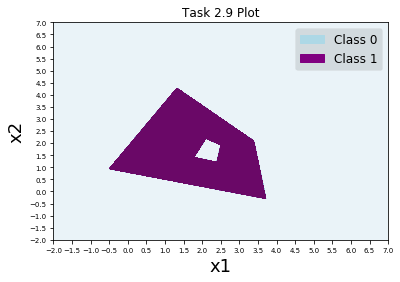

In [38]:
# Generate points between 0 and 10 to classify
x_points = np.linspace(-2,7, 1000)
y_points = np.linspace(-2,7,1000)
xx, yy = np.meshgrid(x_points, y_points)
gridX = np.vstack((xx.ravel(), yy.ravel()))


# Classify the points and reshape the result to fit the plot function
data = sNN_AB_1(gridX.T)
data = data.reshape((x_points.shape[0], y_points.shape[0]))
# Setup the plot title and axis
plt.title('Task 2.9 Plot')
plt.xticks(np.arange(-2, 8, 0.5), fontsize=7)
plt.yticks(np.arange(-2, 8, 0.5),fontsize=7)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)

# Setup legend

blue_patch_legend = mpatches.Patch(color='lightblue', label='Class 0')
purple_patch_legend = mpatches.Patch(color='purple', label='Class 1')
plt.legend(loc='best', fancybox=True, framealpha=0.1, handles=[blue_patch_legend, purple_patch_legend], facecolor='black', fontsize=12)

# Plot data and show result
plt.contourf(xx, yy, data, cmap=cm.BuPu)
plt.savefig('t2_regions_sNN_AB.pdf')
plt.show()

In [39]:
def sNN_AB_1(X):
    Y_A = sNN_A(X)
    Y_B = sNN_B(X)
    Y_AB = np.hstack((Y_A,Y_B))
    Y = task2_sNeuron(300*np.array([0,-1,1]).reshape((3,1)), Y_AB)
    return Y > 0.5